In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold
import h5py
import random
import os
import seaborn as sns
from time import time
import pandas as pd
#from sklearn import datasets
from sklearn.manifold import TSNE
import seaborn as sns
train_dataset = h5py.File("greek_dataset_20200722-5.h5",'r')
X_train = np.array(train_dataset['x_train'][:])
Y_train = np.array(train_dataset['y_train'][:])
X_test = np.array(train_dataset['x_test'][:])
Y_test = np.array(train_dataset['y_test'][:])
train_dataset.close()
XN=X_train.reshape(6400,100)
XT=X_test.reshape(1600,100)
YN=Y_train.reshape(6400)
YT=Y_test.reshape(1600)
X=np.concatenate((XN,XT))
Y=np.concatenate((YN,YT))
print(X.shape)
print(Y.shape)

(8000, 100)
(8000,)


In [3]:
one_input=[]
two_input=[]
three_input=[]
four_input=[]
five_input=[]
six_input=[]
seven_input=[]
eight_input=[]
for i in range(len(X)):
    if Y[i]==0:
        one_input.append(np.sum(X[i]==1))
    elif Y[i]==1:
        two_input.append(np.sum(X[i]==1))
    elif Y[i]==2:
        three_input.append(np.sum(X[i]==1))
    elif Y[i]==3:
        four_input.append(np.sum(X[i]==1))
    elif Y[i]==4:
        five_input.append(np.sum(X[i]==1))
    elif Y[i]==5:
        six_input.append(np.sum(X[i]==1))
    elif Y[i]==6:
        seven_input.append(np.sum(X[i]==1))
    elif Y[i]==7:
        eight_input.append(np.sum(X[i]==1))

In [28]:
from collections import Counter
taining_output=one_input+two_input+three_input+four_input+five_input+six_input+seven_input+eight_input
taining_output.sort()
ginput=dict(Counter(taining_output))
for k,v in ginput.items():
    print(k,v)

9 1
10 2
11 5
12 25
13 28
14 77
15 103
16 129
17 202
18 324
19 333
20 450
21 626
22 659
23 649
24 631
25 669
26 567
27 377
28 316
29 351
30 350
31 243
32 333
33 196
34 126
35 90
36 67
37 30
38 18
39 14
40 3
41 4
42 1
44 1


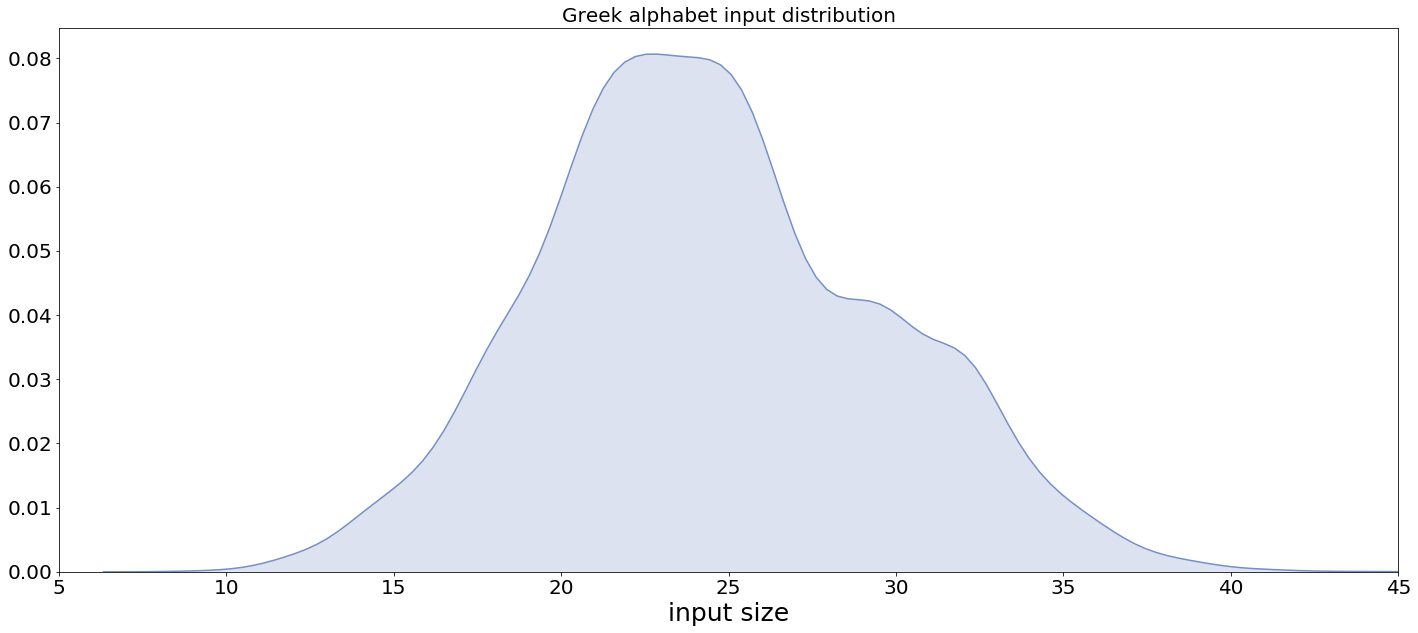

In [39]:
plt.figure(figsize=(24,10))
sns.kdeplot(taining_output,shade=True,color="#758FC7")
plt.xlabel("input size",fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(5,45)
#plt.legend(labels=["greek"],fontsize=20)
plt.title("Greek alphabet input distribution",fontsize=20)
plt.savefig("greek_distribution.pdf")

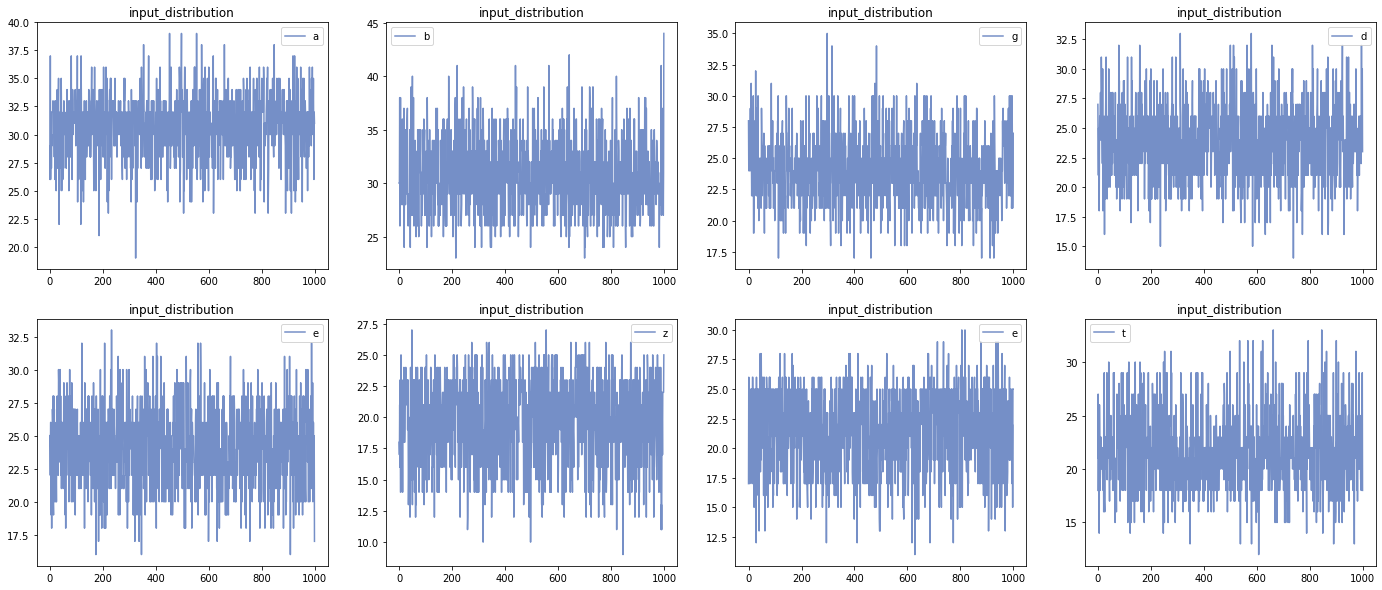

In [5]:
plt.figure(figsize=(24,10))
#ax,fig=plt.subplot()
plt.subplot(241)
#plt.tick_params(labelleft=None,labelbottom=None)
#plt.tick_params(top=None)
plt.plot(one_input,c="#758FC7")
plt.legend("alpha")
plt.title("input_distribution")

plt.subplot(242)
#plt.ylim(10,50)
#plt.tick_params(labelleft=None,labelbottom=None)
#plt.tick_params(top=None)
plt.plot(two_input,c="#758FC7")
plt.legend("beta")
plt.title("input_distribution")
plt.subplot(243)
#plt.ylim(10,50)
#plt.tick_params(labelleft=None,labelbottom=None)
#plt.tick_params(top=None)
plt.plot(three_input,c="#758FC7")
plt.legend("gamma")
plt.title("input_distribution")
plt.subplot(244)
#plt.ylim(10,50)
#plt.tick_params(labelleft=None,labelbottom=None)
#plt.tick_params(top=None)
plt.plot(four_input,c="#758FC7")
plt.legend("delta")
plt.title("input_distribution")
plt.subplot(245)
#plt.ylim(10,50)
#plt.tick_params(labelleft=None,labelbottom=None)
#plt.tick_params(top=None)
plt.plot(five_input,c="#758FC7")
plt.legend("epsilon")
plt.title("input_distribution")
plt.subplot(246)
#plt.ylim(10,50)
#plt.tick_params(labelleft=None,labelbottom=None)
#plt.tick_params(top=None)
plt.plot(six_input,c="#758FC7")
plt.legend("zeta")
plt.title("input_distribution")
plt.subplot(247)
#plt.ylim(10,50)
#plt.tick_params(labelleft=None,labelbottom=None)
#plt.tick_params(top=None)
plt.plot(eight_input,c="#758FC7")
plt.legend("eta")
plt.title("input_distribution")
plt.subplot(248)
#plt.ylim(10,55)
#plt.tick_params(labelleft=None,labelbottom=None)
#plt.tick_params(top=None)
plt.plot(seven_input,c="#758FC7")
plt.legend("theta")
plt.title("input_distribution")
plt.savefig("input_dist.png")

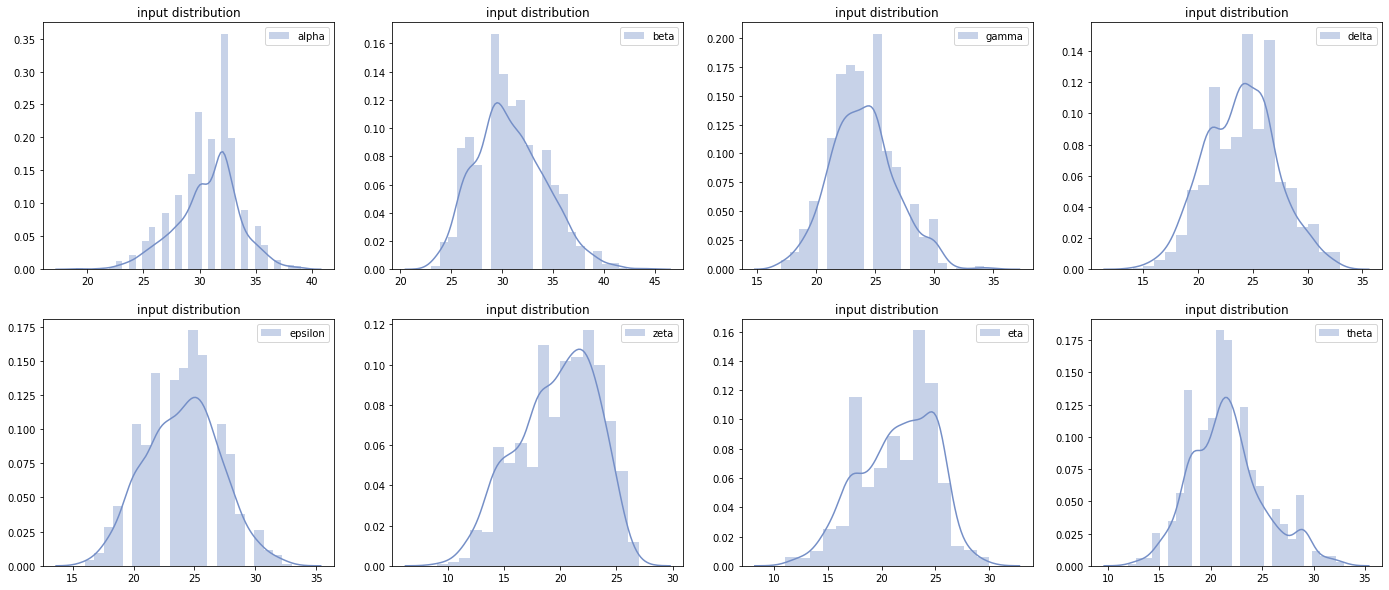

In [6]:
plt.figure(figsize=(24,10))
#ax,fig=plt.subplot()
plt.subplot(241)
#plt.tick_params(labelleft=None,labelbottom=None)
#plt.tick_params(top=None)
sns.distplot(one_input,color="#758FC7")
plt.legend(labels=["alpha"])
plt.title("input distribution")

plt.subplot(242)
#plt.ylim(10,50)
#plt.tick_params(labelleft=None,labelbottom=None)
#plt.tick_params(top=None)
#plt.plot(two_input,c="#758FC7")
sns.distplot(two_input,color="#758FC7")
plt.legend(labels=["beta"])
plt.title("input distribution")
plt.subplot(243)
#plt.ylim(10,50)
#plt.tick_params(labelleft=None,labelbottom=None)
#plt.tick_params(top=None)
#plt.plot(three_input,c="#758FC7")
sns.distplot(three_input,color="#758FC7")
plt.legend(labels=["gamma"])
plt.title("input distribution")
plt.subplot(244)
#plt.ylim(10,50)
#plt.tick_params(labelleft=None,labelbottom=None)
#plt.tick_params(top=None)
#plt.plot(four_input,c="#758FC7")
sns.distplot(four_input,color="#758FC7")
plt.legend(labels=["delta"])
plt.title("input distribution")
plt.subplot(245)
#plt.ylim(10,50)
#plt.tick_params(labelleft=None,labelbottom=None)
#plt.tick_params(top=None)
#plt.plot(five_input,c="#758FC7")
sns.distplot(five_input,color="#758FC7")
plt.legend(labels=["epsilon"])
plt.title("input distribution")
plt.subplot(246)
#plt.ylim(10,50)
#plt.tick_params(labelleft=None,labelbottom=None)
#plt.tick_params(top=None)
#plt.plot(six_input,c="#758FC7")
sns.distplot(six_input,color="#758FC7")
plt.legend(labels=["zeta"])
plt.title("input distribution")
plt.subplot(247)
#plt.ylim(10,50)
#plt.tick_params(labelleft=None,labelbottom=None)
#plt.tick_params(top=None)
#plt.plot(eight_input,c="#758FC7")
sns.distplot(eight_input,color="#758FC7")
plt.legend(labels=["eta"])
plt.title("input distribution")
plt.subplot(248)
#plt.ylim(10,55)
#plt.tick_params(labelleft=None,labelbottom=None)
#plt.tick_params(top=None)
#plt.plot(seven_input,c="#758FC7")
sns.distplot(seven_input,color="#758FC7")
plt.legend(labels=["theta"])
plt.title("input distribution")
plt.savefig("input_dist.png")

[[-47.56938  -42.454018]
 [ 24.421186 -79.29781 ]
 [ 41.671215  -6.730875]
 ...
 [-67.207634 -15.37329 ]
 [ 32.157795  49.441654]
 [-21.35162  -55.79227 ]]


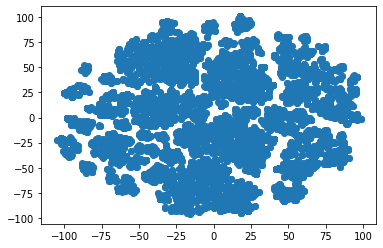

In [29]:
tsne = TSNE(n_components=2, init='pca', random_state=501,perplexity=5)
result = tsne.fit_transform(X)
print(result)
plt.scatter(result[:,0],result[:,1])

In [30]:
xmin=np.min(result,0)
xmax=np.max(result,0)
R=(np.array(result)-xmin)/(xmax-xmin)

In [32]:
for i in range(R.shape[0]):
    print(R[i][0],R[i][1],Y[i])

0.282639 0.2717276 5.0
0.6355718 0.084296316 3.0
0.7201398 0.4534579 4.0
0.39510673 0.87757915 0.0
0.48003748 0.48738468 7.0
0.6733609 0.7395953 6.0
0.23239739 0.5965003 7.0
0.5852169 0.79605407 6.0
0.8992446 0.56352943 2.0
0.2648009 0.3264908 5.0
0.50781256 0.6784803 6.0
0.42187297 0.76745474 0.0
0.87738705 0.7503742 2.0
0.35105205 0.096582614 3.0
0.17079367 0.49970305 7.0
0.21241918 0.7667108 0.0
0.5215764 0.7304059 6.0
0.87511504 0.5744284 2.0
0.18328264 0.5935655 7.0
0.8613211 0.34070835 4.0
0.78227437 0.5717545 2.0
0.23191074 0.17229283 5.0
0.46475402 0.31480938 1.0
0.57411057 0.69562286 6.0
0.5707905 0.11254252 3.0
0.29015017 0.4789389 7.0
0.64470726 0.35231292 1.0
0.37116683 0.26373014 5.0
0.48003402 0.5806225 7.0
0.3230896 0.57927555 7.0
0.82252514 0.5681006 2.0
0.4350324 0.054400824 3.0
0.24972911 0.6899684 0.0
0.46441168 0.015956996 3.0
0.36810195 0.49023277 7.0
0.9670478 0.6672745 2.0
0.04773053 0.29345557 5.0
0.4379715 0.51790845 7.0
0.4112622 0.67053103 0.0
0.16453065 0.68

0.21451476 0.6015351 7.0
0.08280669 0.6338905 7.0
0.45185384 0.71366364 0.0
0.4889643 0.644041 6.0
0.70683116 0.37573168 1.0
0.65548676 0.30668238 1.0
0.48054203 0.49131414 7.0
0.55111814 0.6966407 6.0
0.3763417 0.14283215 3.0
0.7006504 0.5212536 4.0
0.40908664 0.58466035 7.0
0.9215829 0.31332272 4.0
0.6005729 0.24789639 1.0
0.45394194 0.40831846 1.0
0.6545775 0.6782895 6.0
0.107092686 0.23273847 5.0
0.87103856 0.34995782 4.0
0.65292025 0.872695 6.0
0.7380543 0.4848206 4.0
0.09905699 0.42507306 5.0
0.45710602 0.20248717 3.0
0.7847618 0.6159208 2.0
0.29594156 0.18655194 3.0
0.19138993 0.16748482 5.0
0.26265582 0.5421486 7.0
0.61838305 0.32938918 1.0
0.95319563 0.5781423 2.0
0.23220988 0.58866715 7.0
0.38965532 0.3108851 5.0
0.6583811 0.5105831 1.0
0.21359603 0.11174353 5.0
0.56516623 0.3932736 1.0
0.29340494 0.6116285 7.0
0.48203766 0.5522871 7.0
0.18047068 0.6080432 7.0
0.75995666 0.72409457 2.0
0.82903767 0.30225664 4.0
0.54870576 0.2183619 3.0
0.10118746 0.45426115 5.0
0.7893558 0.48

0.92716444 0.7306081 2.0
0.45604485 0.5651694 7.0
0.75721437 0.8135608 2.0
0.87429786 0.39667055 4.0
0.5474228 0.39195135 1.0
0.39212057 0.53736323 7.0
0.69085836 0.48027858 4.0
0.2319736 0.17325298 5.0
0.7910757 0.7799506 2.0
0.58266187 0.35714427 1.0
0.34210825 0.23632933 3.0
0.7685106 0.60619146 2.0
0.4765307 0.14607362 3.0
0.7989209 0.5083753 4.0
0.5375307 0.07326148 3.0
0.5539152 0.8766196 6.0
0.45870066 0.2538923 3.0
0.12365967 0.30993256 5.0
0.38843298 0.3144078 5.0
0.6445244 0.12301893 3.0
0.46783188 0.44781515 1.0
0.26480165 0.33024925 5.0
0.07806781 0.65255433 7.0
0.55391556 0.22129309 3.0
0.81270164 0.8839234 2.0
0.35508126 0.88787496 0.0
0.439192 0.42927533 1.0
0.47390807 0.24751487 3.0
0.8750836 0.8445261 2.0
0.5509596 0.1275036 3.0
0.7300931 0.78000146 2.0
0.5579393 0.07483888 3.0
0.40133432 0.76326704 0.0
0.4808608 0.48667857 7.0
0.8363534 0.32167456 4.0
0.37874746 0.5588728 7.0
0.15258479 0.35969028 5.0
0.6469339 0.52381384 1.0
0.58880717 0.7144571 6.0
0.74567014 0.7946

0.9710056 0.605845 2.0
0.5799747 0.4242485 1.0
0.7519082 0.28702217 4.0
0.611392 0.1334329 3.0
0.3947549 0.07616719 3.0
0.38886142 0.4879524 7.0
0.28904986 0.49464417 7.0
0.71479696 0.53885627 4.0
0.57547534 0.35319373 1.0
0.8889594 0.6394201 2.0
0.8344035 0.7309974 2.0
0.47361544 0.3714567 1.0
0.53802836 0.016765881 3.0
0.8391022 0.5978569 2.0
0.7934055 0.27344215 4.0
0.6365414 0.21636684 1.0
0.18667714 0.39936385 5.0
0.43520832 0.6108658 7.0
0.52984416 0.03728478 3.0
0.374102 0.61770105 7.0
0.36701804 0.28004014 5.0
0.2506022 0.25567892 5.0
0.7184276 0.801926 2.0
0.27454257 0.5403609 7.0
0.17218053 0.1959991 5.0
0.3673905 0.47879893 7.0
0.4317952 0.048386376 3.0
0.040217653 0.483037 5.0
0.24834168 0.87321824 0.0
0.37529588 0.7346611 0.0
0.653071 0.5827286 6.0
0.68770456 0.32235768 1.0
0.11259979 0.24802904 5.0
0.93795663 0.27044612 4.0
0.03527477 0.6118458 7.0
0.9868628 0.5036102 2.0
0.44168454 0.109780334 3.0
0.7857413 0.15889324 4.0
0.6558501 0.3061883 1.0
0.23248829 0.6000341 7.0


0.8641689 0.31548467 4.0
0.5858375 0.96017545 6.0
0.37530273 0.9726191 0.0
0.5847301 0.9406252 6.0
0.59023255 0.495785 1.0
0.37761563 0.8781539 0.0
0.5915306 0.67792773 6.0
0.5409814 0.42665675 1.0
0.020091845 0.38010052 5.0
0.16579393 0.50496095 7.0
0.70115936 0.42422238 4.0
0.7520042 0.41753396 4.0
0.533962 0.43542567 1.0
0.35903764 0.14577295 3.0
0.49253854 0.5542168 7.0
0.553448 0.5028115 1.0
0.98170304 0.6930768 2.0
0.27280465 0.4822536 7.0
0.6408056 0.7368384 6.0
0.5673814 0.7864691 6.0
0.32484925 0.17890416 3.0
0.3132817 0.48141912 7.0
0.30770558 0.4617257 7.0
0.8025413 0.3318149 4.0
0.856701 0.53282857 2.0
0.50107914 0.33887848 1.0
0.69737136 0.5212493 4.0
0.3247879 0.6341511 7.0
0.588877 0.5123767 1.0
0.62904024 0.31260064 1.0
0.17343593 0.16673498 5.0
0.67289704 0.5652677 6.0
0.35467792 0.8445257 0.0
0.7505022 0.7728129 2.0
0.49544597 0.37189427 1.0
0.66507006 0.5928009 6.0
0.5458012 0.6052338 6.0
0.91268307 0.3602493 4.0
0.29930866 0.4639832 7.0
0.3724101 0.9675448 0.0
0.714

0.3408136 0.07449493 3.0
0.10706243 0.224372 5.0
0.24536115 0.123080134 5.0
0.09812244 0.53734434 7.0
0.08784821 0.42308146 5.0
0.33732402 0.69239664 0.0
0.35963207 0.32311758 5.0
0.7107636 0.65096575 6.0
0.3408136 0.07449493 3.0
0.805418 0.81957173 2.0
0.20117036 0.11685649 5.0
0.3482306 0.38310197 5.0
0.20013253 0.36894852 5.0
0.7148342 0.37973994 1.0
0.38314113 0.73292714 0.0
0.50713617 0.38340688 1.0
0.83211035 0.3845519 4.0
0.5403761 0.20348199 3.0
0.57430285 0.65663475 6.0
0.6455284 0.68024254 6.0
0.23670699 0.3578078 5.0
0.7435244 0.89601123 2.0
0.58635825 0.7538056 6.0
0.6548899 0.67806095 6.0
0.488515 0.5077484 7.0
0.52190894 0.7695131 6.0
0.92672026 0.26836988 4.0
0.767796 0.3007245 4.0
0.57951754 0.6227989 6.0
0.5166316 0.34122315 1.0
0.78350985 0.6590902 2.0
0.63327986 0.72532344 6.0
0.78176045 0.6582983 2.0
0.7563322 0.6607185 2.0
0.4217202 0.76750344 0.0
0.6916199 0.5994702 6.0
0.37327692 0.77629405 0.0
0.6248485 0.24815807 1.0
0.34210795 0.20670778 3.0
0.2946134 0.272499

0.20439196 0.24952812 5.0
0.813266 0.8954727 2.0
0.5656958 0.87359613 6.0
0.9391967 0.26214135 4.0
0.898823 0.6892893 2.0
0.7107636 0.65096575 6.0
0.45394984 0.7163707 0.0
0.033123948 0.48532766 5.0
0.2915973 0.766655 0.0
0.5295326 0.4648059 1.0
0.40969357 0.8423632 0.0
0.26153398 0.2867065 5.0
0.31750572 0.73102003 0.0
0.6298704 0.01712268 3.0
0.4121083 0.54758775 7.0
0.3457582 0.29008728 5.0
0.8981778 0.7277169 2.0
0.7103703 0.46982625 4.0
0.932886 0.6284148 2.0
0.78005975 0.40613925 4.0
0.4633681 0.8286032 0.0
0.90160877 0.58031446 2.0
0.069526866 0.65130925 7.0
0.81552607 0.38749492 4.0
0.2754799 0.38903132 5.0
0.15225352 0.6742828 0.0
0.14825623 0.575397 7.0
0.6262958 0.10516278 3.0
0.35683987 0.89998984 0.0
0.5410904 0.44991598 1.0
0.66652113 0.3265272 1.0
0.40805426 0.17614177 3.0
0.9515538 0.53373325 2.0
0.07017592 0.34371465 5.0
0.597504 0.42455277 1.0
0.547681 0.62275785 6.0
0.937823 0.49564335 2.0
0.26089668 0.8002235 0.0
0.1764049 0.60835147 7.0
0.23985195 0.1585045 5.0
0.7

0.6363422 0.36134568 1.0
0.015768133 0.3849753 5.0
0.51675206 0.94763446 0.0
0.6030747 0.93522704 6.0
0.19595239 0.25970158 5.0
0.24421763 0.23776463 5.0
0.45384225 0.7012338 0.0
0.51602685 0.032551367 3.0
0.6478772 0.8557875 6.0
0.2906853 0.5918617 7.0
0.86809886 0.7813269 2.0
0.5054262 0.63600874 6.0
0.6221446 0.31896895 1.0
0.2442662 0.12541609 5.0
0.76404744 0.63910353 2.0
0.4537296 0.4092441 1.0
0.14683974 0.29908976 5.0
0.6537168 0.2025474 1.0
0.2125058 0.76681876 0.0
0.8696106 0.50956553 2.0
0.1044416 0.46227086 5.0
0.63212794 0.14977351 3.0
0.35709506 0.38866177 5.0
0.08508783 0.45712432 5.0
0.8045596 0.5187811 4.0
0.07170683 0.4701423 5.0
0.21599543 0.11696967 5.0
0.61230534 0.86691344 6.0
0.5621017 0.7692622 6.0
0.9525677 0.45676723 2.0
0.7415999 0.4989425 4.0
0.43621674 0.6189823 7.0
0.9443532 0.4981122 2.0
0.56247103 0.64994895 6.0
0.39621508 0.79452556 0.0
0.49435753 0.271873 3.0
0.922605 0.527596 2.0
0.87881213 0.845917 2.0
0.49929762 0.56067914 7.0
0.54519624 0.60696685 

0.54271454 0.75001866 6.0
0.6657048 0.7057913 6.0
0.49673757 0.96370596 0.0
0.45517546 0.40586537 1.0
0.34179547 0.19207773 3.0
0.32090557 0.45443472 7.0
0.27702096 0.47084054 7.0
0.48236427 0.16697074 3.0
0.35950056 0.7119104 0.0
0.19978297 0.3702389 5.0
0.8899075 0.5185174 2.0
0.21302137 0.31266505 5.0
0.31602 0.46821883 7.0
0.7918743 0.15947767 4.0
0.16590016 0.67295754 0.0
0.5581238 0.48300257 1.0
0.5524855 0.091755465 3.0
0.60408455 0.39473444 1.0
0.37482783 0.62701136 7.0
0.44845948 0.75956374 0.0
0.60945636 0.8677119 6.0
0.80527085 0.45446655 4.0
0.59998214 0.5894246 6.0
0.7860869 0.81064034 2.0
0.4071831 0.39152312 1.0
0.76576686 0.10571911 4.0
0.37613052 0.5652089 7.0
0.32116565 0.2177773 3.0
0.48230812 0.8593618 0.0
0.6152435 0.7581077 6.0
0.601313 1.0 6.0
0.36744896 0.66953397 0.0
0.18636274 0.4094923 5.0
0.67350036 0.739218 6.0
0.4111712 0.2038734 3.0


In [33]:
fire=[]
for i in range(result.shape[0]):
    if Y[i]==0:
        #plt.scatter(result[i, 0], result[i, 1], c="r")
        fire.append(result[i])
sparsefire=random.sample(fire,10)
fire=(np.array(fire)-xmin)/(xmax-xmin)
print(fire)
soil=[]
for i in range(result.shape[0]):
    if Y[i]==1:
        #plt.scatter(result[i, 0], result[i, 1], c="r")
        soil.append(result[i])
sparsesoil=random.sample(soil,10)
soil=(np.array(soil)-xmin)/(xmax-xmin)
wood=[]
for i in range(result.shape[0]):
    if Y[i]==2:
        #plt.scatter(result[i, 0], result[i, 1], c="r")
        wood.append(result[i])
sparsewood=random.sample(wood,10)
wood=(np.array(wood)-xmin)/(xmax-xmin)
water=[]
for i in range(result.shape[0]):
    if Y[i]==3:
        #plt.scatter(result[i, 0], result[i, 1], c="r")
        water.append(result[i])
sparsewater=random.sample(water,10)
water=(np.array(water)-xmin)/(xmax-xmin)
gas=[]
for i in range(result.shape[0]):
    if Y[i]==4:
        #plt.scatter(result[i, 0], result[i, 1], c="r")
        gas.append(result[i])
sparsegas=random.sample(gas,10)
gas=(np.array(gas)-xmin)/(xmax-xmin)
sky=[]
for i in range(result.shape[0]):
    if Y[i]==5:
        #plt.scatter(result[i, 0], result[i, 1], c="r")
        sky.append(result[i])
sparsesky=random.sample(sky,10)
sky=(np.array(sky)-xmin)/(xmax-xmin)
human=[]
for i in range(result.shape[0]):
    if Y[i]==6:
        #plt.scatter(result[i, 0], result[i, 1], c="r")
        human.append(result[i])
sparsehuman=random.sample(human,10)
human=(np.array(human)-xmin)/(xmax-xmin)
life=[]
for i in range(result.shape[0]):
    if Y[i]==7:
        #plt.scatter(result[i, 0], result[i, 1], c="r")
        life.append(result[i])
#sparselife=random.sample(life,10)
life=(np.array(life)-xmin)/(xmax-xmin)

[[0.39510673 0.87757915]
 [0.42187297 0.76745474]
 [0.21241918 0.7667108 ]
 ...
 [0.44845948 0.75956374]
 [0.48230812 0.8593618 ]
 [0.36744896 0.66953397]]


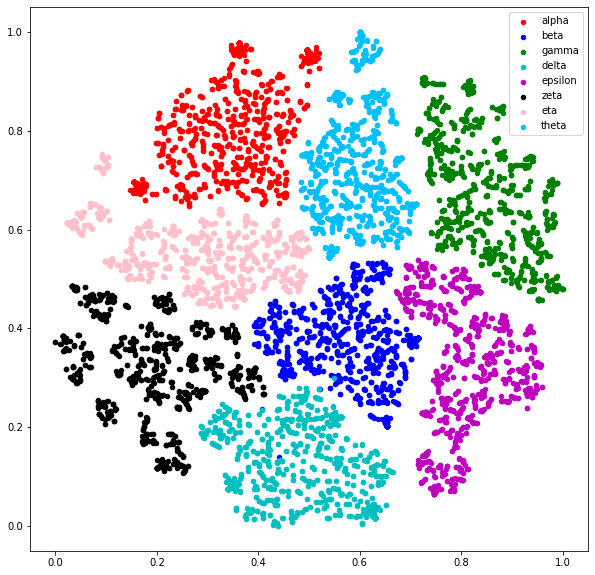

In [34]:
plt.figure(figsize=(10,10))
plt.scatter(fire[:,0],fire[:,1],c="red",label="alpha",s=20)
plt.scatter(soil[:,0],soil[:,1],c="blue",label="beta",s=20)
plt.scatter(wood[:,0],wood[:,1],c="g",label="gamma",s=20)
plt.scatter(water[:,0],water[:,1],c="c",label="delta",s=20)
plt.scatter(gas[:,0],gas[:,1],c="m",label="epsilon",s=20)
plt.scatter(sky[:,0],sky[:,1],c="k",label="zeta",s=20)
plt.scatter(life[:,0],life[:,1],c="pink",label="eta",s=20)
plt.scatter(human[:,0],human[:,1],c="deepskyblue",label="theta",s=20)

plt.legend()
plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
plt.savefig("pix5.png")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


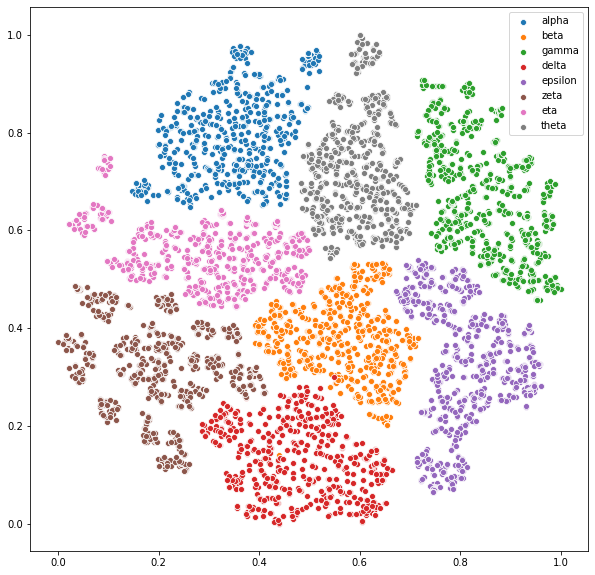

In [37]:
plt.figure(figsize=(10,10))
sns.scatterplot(fire[:,0],fire[:,1])
sns.scatterplot(soil[:,0],soil[:,1])
sns.scatterplot(wood[:,0],wood[:,1])
sns.scatterplot(water[:,0],water[:,1])
sns.scatterplot(gas[:,0],gas[:,1])
sns.scatterplot(sky[:,0],sky[:,1])
sns.scatterplot(life[:,0],life[:,1])
sns.scatterplot(human[:,0],human[:,1])

plt.legend(labels=["alpha","beta","gamma","delta","epsilon","zeta","eta","theta"])
plt.savefig("greek_tsne.eps")

In [46]:
sparsefire=(np.array(sparsefire)-xmin)/(xmax-xmin)
sparsesoil=(np.array(sparsesoil)-xmin)/(xmax-xmin)
sparsewood=(np.array(sparsewood)-xmin)/(xmax-xmin)
sparsewater=(np.array(sparsewater)-xmin)/(xmax-xmin)
sparsegas=(np.array(sparsegas)-xmin)/(xmax-xmin)
sparsesky=(np.array(sparsesky)-xmin)/(xmax-xmin)
sparsehuman=(np.array(sparsehuman)-xmin)/(xmax-xmin)
sparselife=(np.array(sparselife)-xmin)/(xmax-xmin)



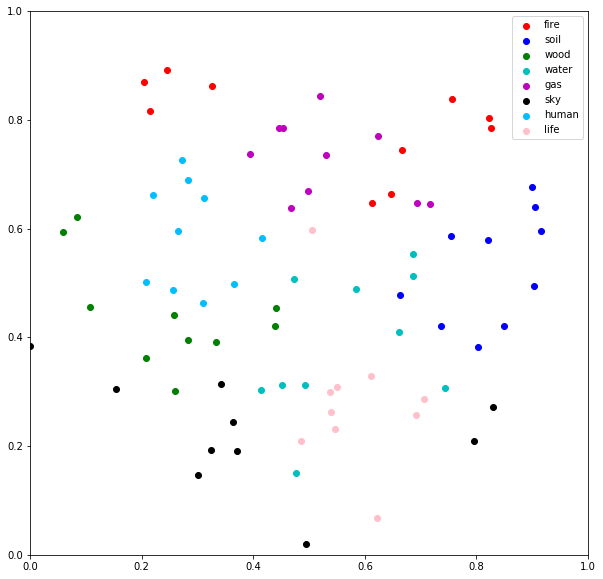

In [49]:
plt.figure(figsize=(10,10))
plt.scatter(sparsefire[:,0],sparsefire[:,1],c="red",label="fire")
plt.scatter(sparsesoil[:,0],sparsesoil[:,1],c="blue",label="soil")
plt.scatter(sparsewood[:,0],sparsewood[:,1],c="g",label="wood")
plt.scatter(sparsewater[:,0],sparsewater[:,1],c="c",label="water")
plt.scatter(sparsegas[:,0],sparsegas[:,1],c="m",label="gas")
plt.scatter(sparsesky[:,0],sparsesky[:,1],c="k",label="sky")
plt.scatter(sparsehuman[:,0],sparsehuman[:,1],c="deepskyblue",label="human")
plt.scatter(sparselife[:,0],sparselife[:,1],c="pink",label="life")
plt.legend()
plt.xlim(0,1)
plt.ylim(0,1)
plt.savefig("pix6.png")

In [36]:
import random
def takesecond(elem):
    return elem[0]
a.sort(key=takesecond)
random.sample(a,10)

NameError: name 'a' is not defined

<function matplotlib.pyplot.show(*args, **kw)>

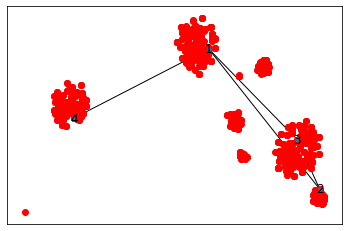

In [88]:
import networkx as nx
a=np.array(a)
#print(a)
G=nx.Graph()
G.add_edges_from([(1 ,2) , (2 ,3) , (1 ,3) , (1 ,4) ])
pos = { 1: (10.182479, 87.863976), 2: (57.01368, 41.06306), 3: (47.660698, 57.48242),4: (-46.63841,  64.69252)} 
nx.draw_networkx(G,pos=pos,node_size=10)
plt.scatter(a[:,0],a[:,1],c="red")
plt.show

In [80]:
arr1 = np.array([1, 2, 3])

arr2 = np.array([4, 5, 6])

arr = np.concatenate((arr1, arr2))

print(arr)

[1 2 3 4 5 6]


In [16]:
X=np.zeros((96,96))
for i in range(8):
    for j in range(8):
        X[10*i+1:10*i+11,10*j+1:10*j+11]=np.squeeze(X_train[(j+1)*(i+1)])
print(X.shape)

(96, 96)


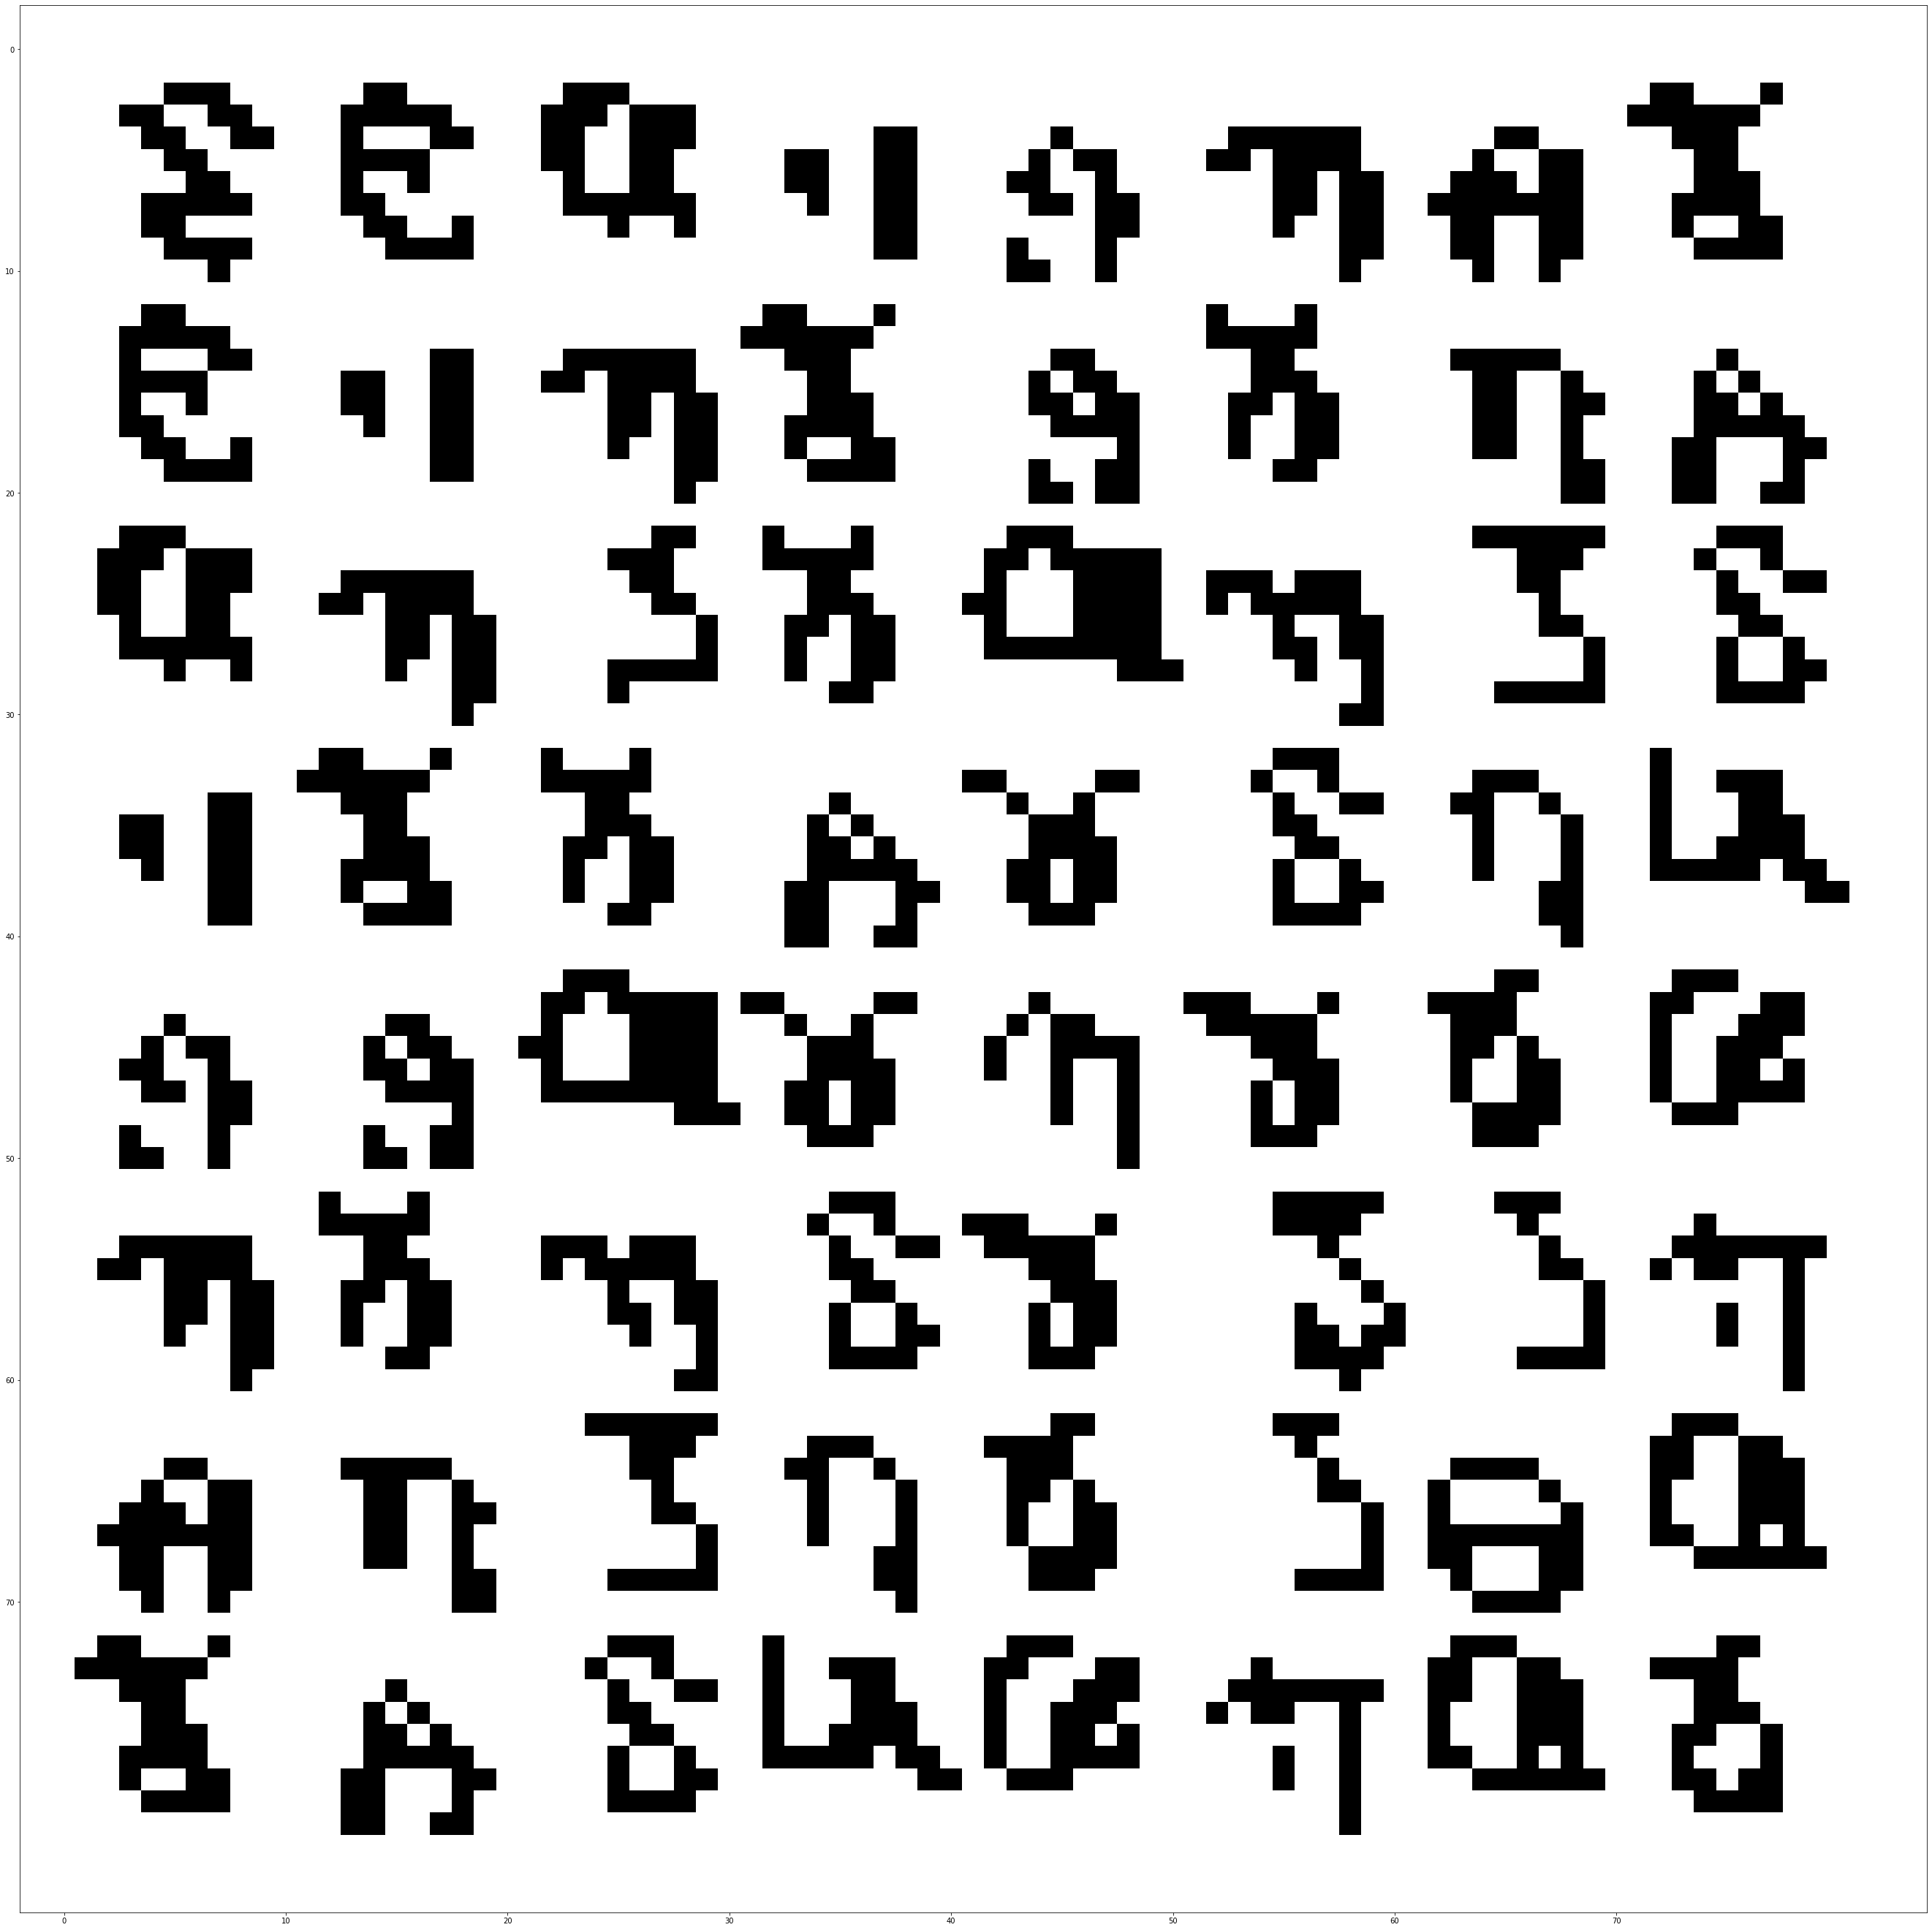

In [22]:
plt.figure(figsize=(48,48))
plt.imshow(X,plt.cm.binary)
plt.xticks(np.arange(0,80,10))
plt.yticks(np.arange(0,80,10))
plt.xlim(-2,84)
plt.ylim(84,-2)
plt.grid(alpha=0.9,which="minor")
plt.savefig("gr.png")